# Imports

In [1]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pylab as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import math
import warnings
warnings.filterwarnings("ignore")

# Functions

In [2]:
def kmean_clusters(df,num_clusters):
    """K-mean clustering"""
    X = df.select_dtypes("number").copy()
    scaler = StandardScaler()
    clusters = KMeans(n_clusters=num_clusters)
    pipe = make_pipeline(scaler, clusters)
    pipe.fit(X)
    df["clusters"] = pipe["kmeans"].labels_
    
    return df

In [3]:
def pairplot_clusters(df,x,save_file_name):
    """Make pairplot of clusters"""
    sns.pairplot(data=df[['height', 'weight', 'strength', 'dexterity', 'constitution',
           'intelligence', 'wisdom', 'charisma', x]], hue=x, palette="tab10")
    
    plt.savefig(save_file_name, transparent=True)

    plt.show()

In [4]:
def barplot_clusters(df,x,save_file_name):
    """Make bar plot of clusters"""
    var_list = ["height", "weight","strength", "dexterity",
            "constitution", 'intelligence',"wisdom","charisma"]
    
    rows = math.ceil(len(var_list)/3)

    fig, axs = plt.subplots(rows, 3, figsize=(20,5*rows))

    for i, ax in zip(var_list, axs.flat):
        g = sns.barplot(data=df, x=x, y=i, ax=ax, palette="tab10")
        ax.set(xlabel="", ylabel="", title=i)

    for i in axs.flat[::-1][:rows*3-len(var_list)]:
        i.set_axis_off()
    
    plt.savefig(save_file_name, transparent=True)
    plt.title("")
    plt.show()

In [5]:
def new_df(df, cluster):
    """ Make copy of df """
    df_new = df.loc[dnd.clusters == cluster].copy()
    
    return df_new

In [6]:
def cluster_clusters(df,num_clusters):
    """ Make sub-clusters """
    df_new = df.copy()
    X = df_new.select_dtypes("number").copy()
    scaler = StandardScaler()
    clusters = KMeans(n_clusters=num_clusters)
    pipe = make_pipeline(scaler, clusters)
    pipe.fit(X)
    df_new["sub_clusters"] = pipe["kmeans"].labels_
    
    return df_new

In [7]:
def add_new_col(df, col, new_col_name, col_val_lst, new_name_lst):
    """Add a new column based on the value in another"""
    dct = {}
    for i in range(len(new_name_lst)):
        dct.update({col_val_lst[i]: new_name_lst[i]})
    df[new_col_name] = [dct[i] for i in df[col]]
    return df

# DF

In [8]:
dnd = pd.read_csv("DND(Original).csv")
# Fix errors in DF
dnd.dexterity.loc[dnd.race == "dragonborn"] = dnd.dexterity.loc[dnd.race == "dragonborn"] - 2
dnd.dexterity.loc[dnd.race == "half.orc"] = dnd.dexterity.loc[dnd.race == "half.orc"] - 2
dnd.dexterity.loc[dnd.race == "elf"] = dnd.dexterity.loc[dnd.race == "elf"] + 2
dnd.dexterity.loc[dnd.race == "halfling"] = dnd.dexterity.loc[dnd.race == "halfling"] + 2

# K-mean an PCA

In [9]:
dnd = kmean_clusters(dnd,4)

# Save/load DF

In [10]:
# load
dnd = pd.read_csv("dnd")

# Plot Clusters 

## Pairplot clusters

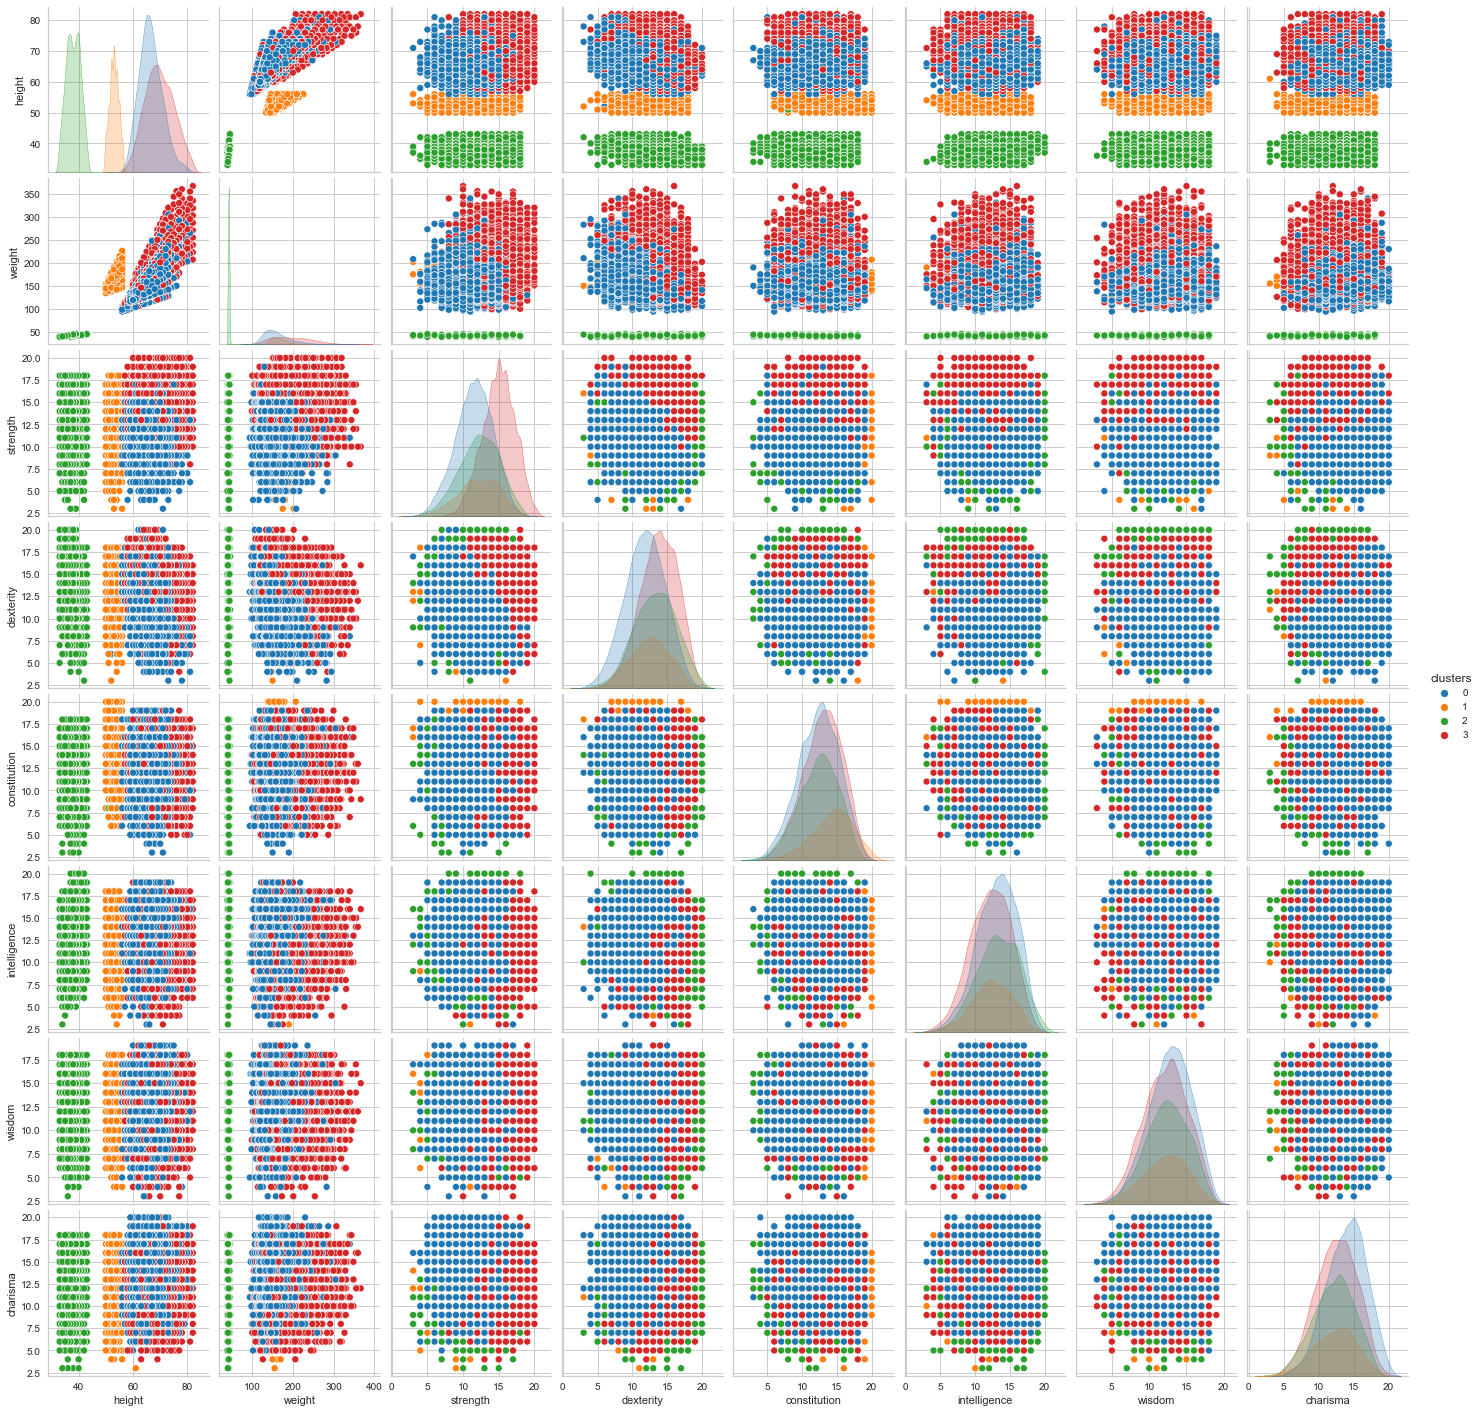

In [11]:
pairplot_clusters(dnd,"clusters", "full_pair")

## Barplot clusters

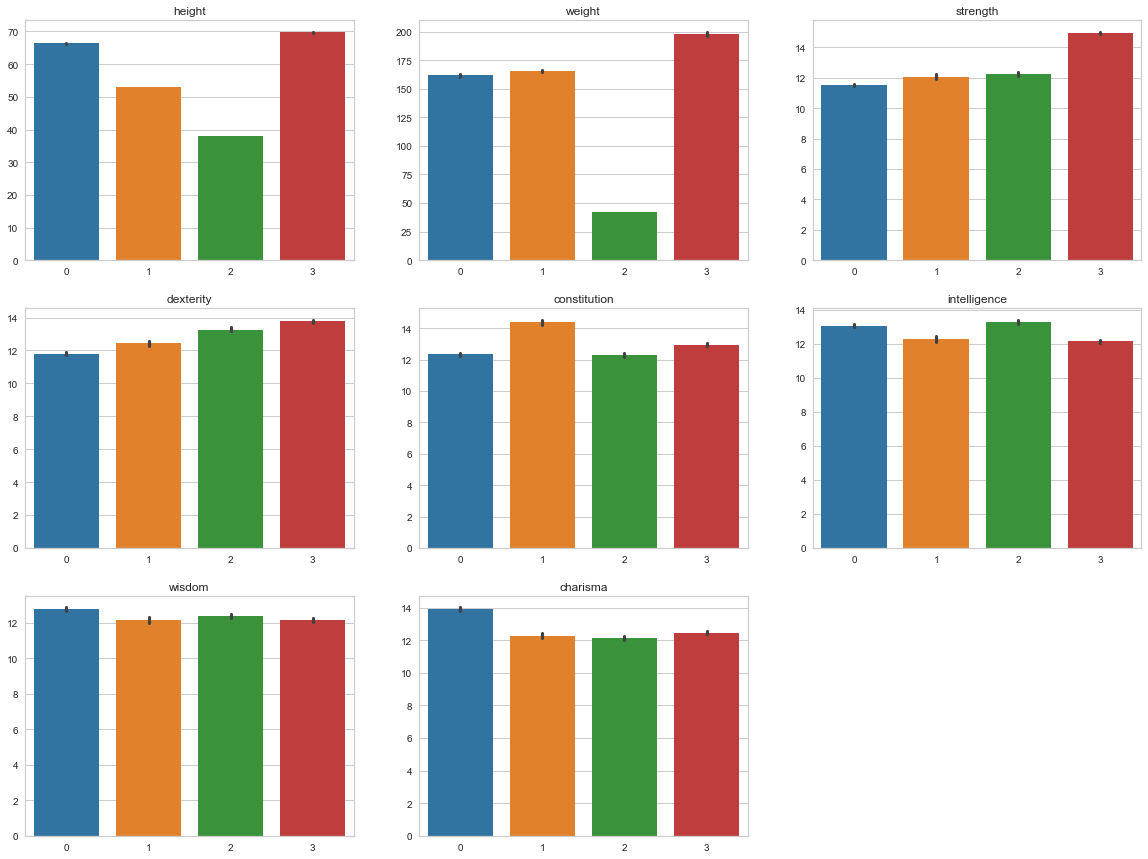

In [12]:
barplot_clusters(dnd, "clusters", "full_bar")

# Rename clusters

In [13]:
add_new_col(dnd, "clusters", "group", [0,1,2,3], 
            ["The Average", "The Compact", "Small Boys", "Big Boys"])

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma,clusters,group
0,dragonborn,79,279,30,14,13,12,7,13,16,3,Big Boys
1,dragonborn,79,331,30,11,9,11,13,13,17,0,The Average
2,dragonborn,71,230,30,14,14,11,13,10,18,3,Big Boys
3,dragonborn,75,265,30,8,17,7,10,13,16,0,The Average
4,dragonborn,72,229,30,8,15,14,14,10,9,3,Big Boys
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,tiefling,63,146,30,13,18,17,13,15,13,3,Big Boys
9996,tiefling,72,230,30,8,14,13,6,14,20,0,The Average
9997,tiefling,66,137,30,4,5,16,12,12,15,0,The Average
9998,tiefling,68,143,30,12,16,12,15,9,16,0,The Average


## Plot with new name

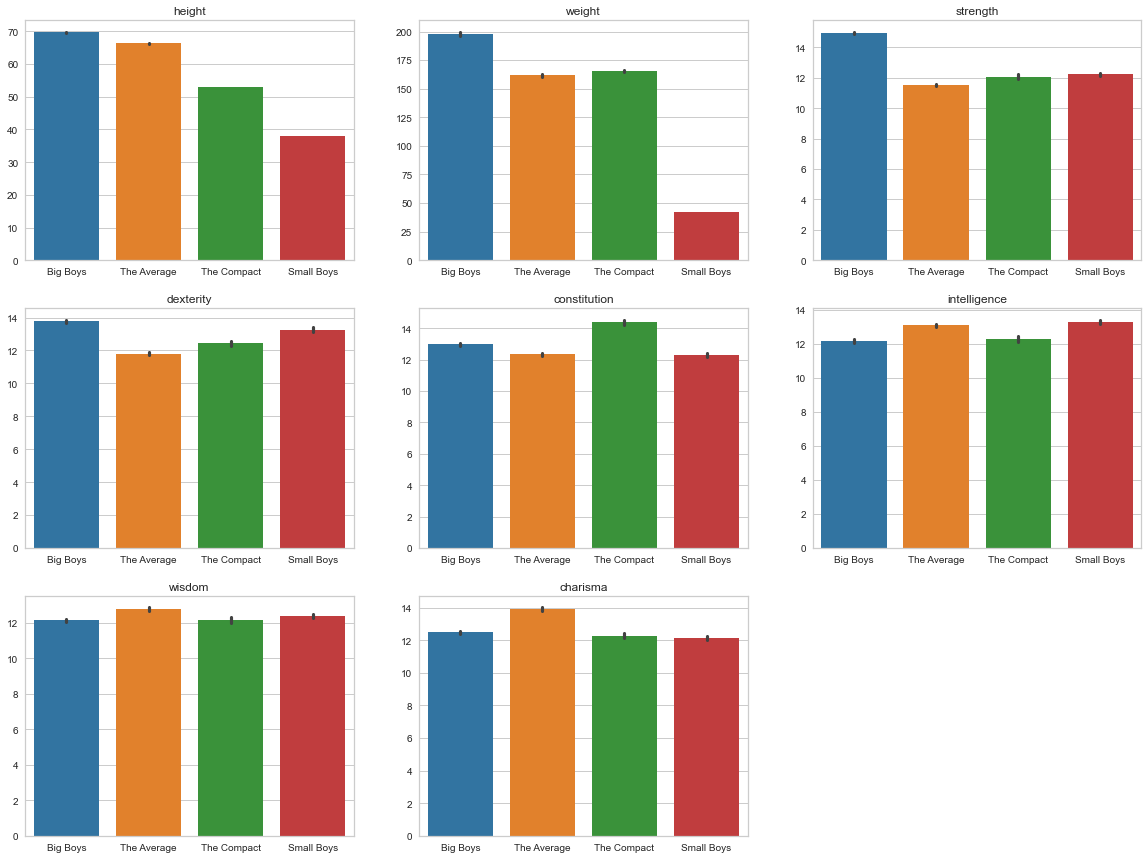

In [14]:
barplot_clusters(dnd, "group", "full_bar_group")

# Clusters

## cluster 0

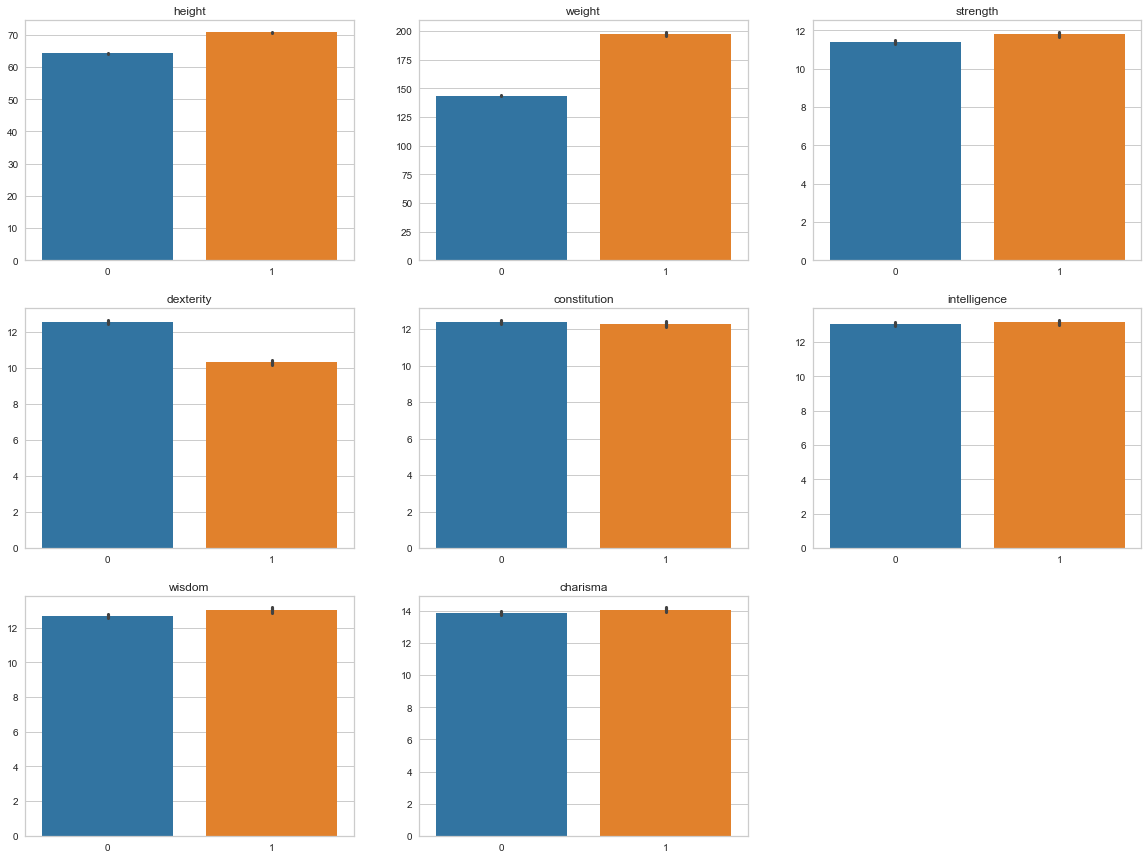

In [20]:
cluster_0 = new_df(dnd,0)
cluster_0 = cluster_clusters(cluster_0,2)
barplot_clusters(cluster_0, "sub_clusters", "cluster_0")

## cluster 1

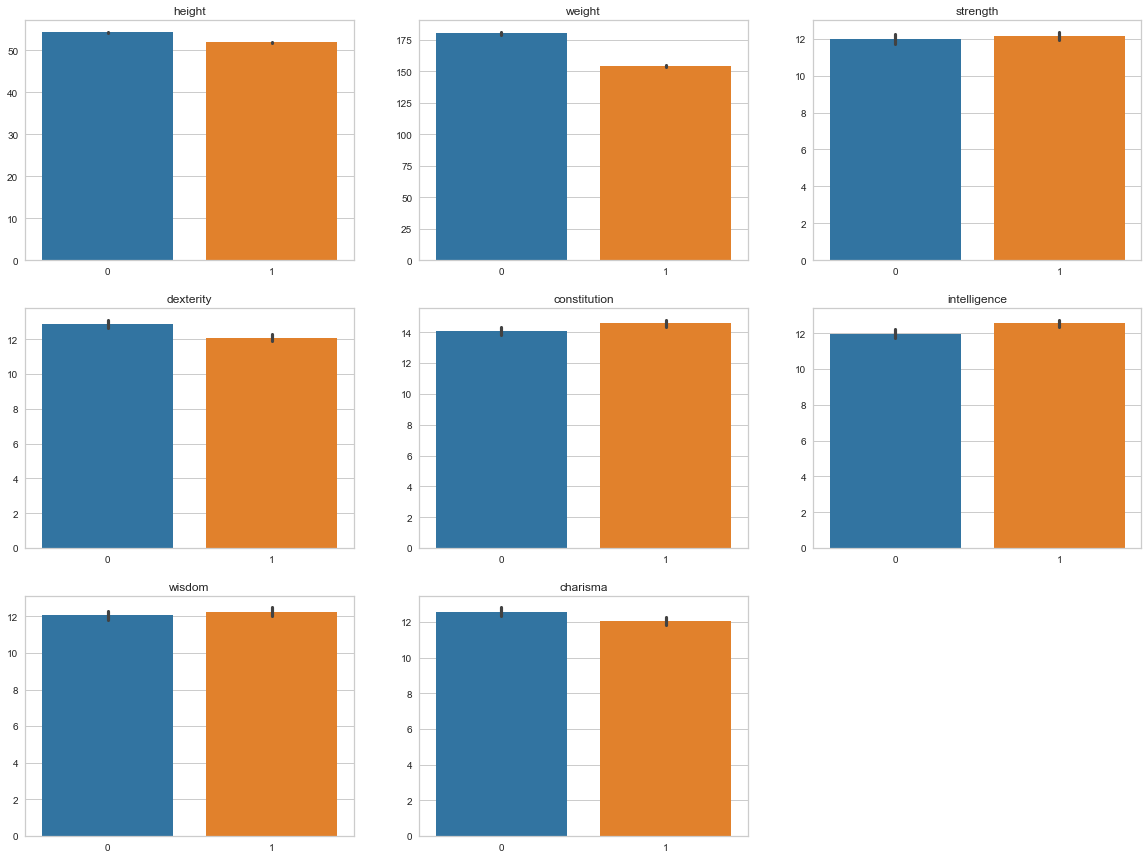

In [16]:
cluster_1  = new_df(dnd,1)
cluster_1 = cluster_clusters(cluster_1,2)
barplot_clusters(cluster_1, "sub_clusters", "cluster_1_bar")

## cluster 2

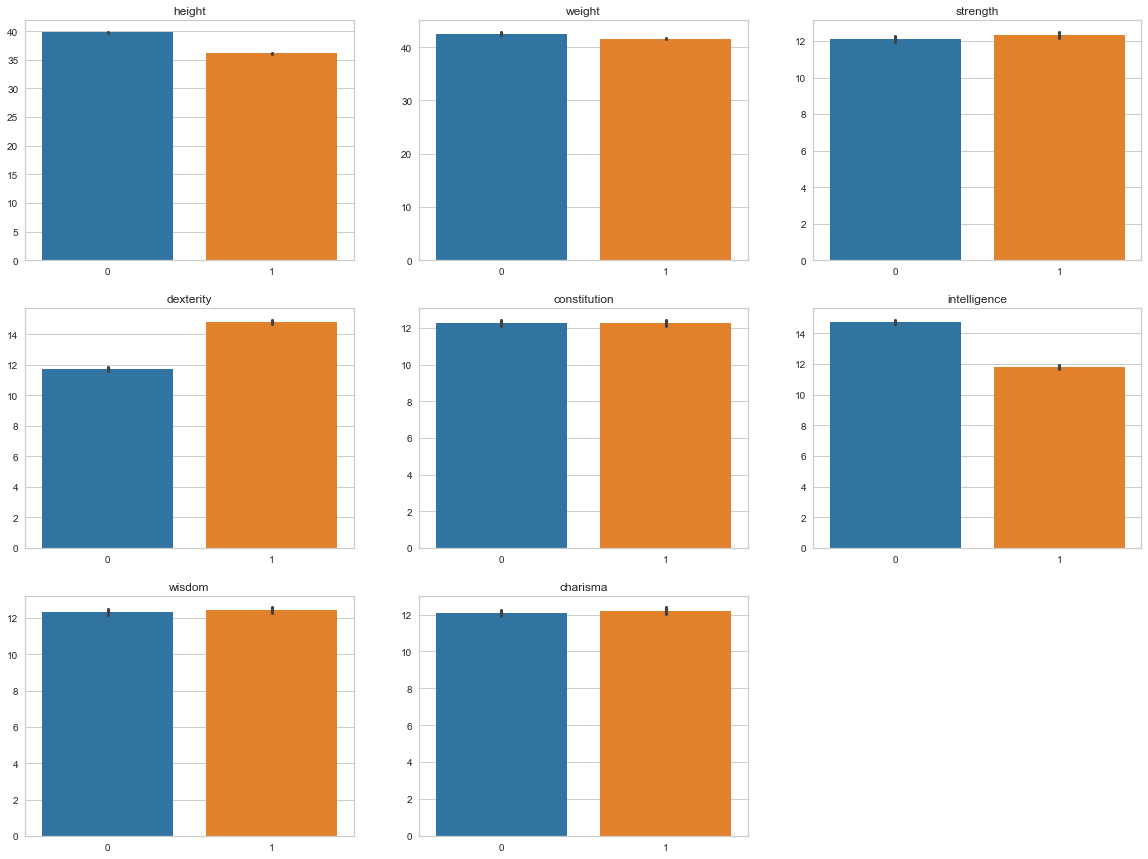

In [17]:
cluster_2  = new_df(dnd,2)
cluster_2 = cluster_clusters(cluster_2,2)
barplot_clusters(cluster_2, "sub_clusters", "cluster_2_bar")

## cluster 3

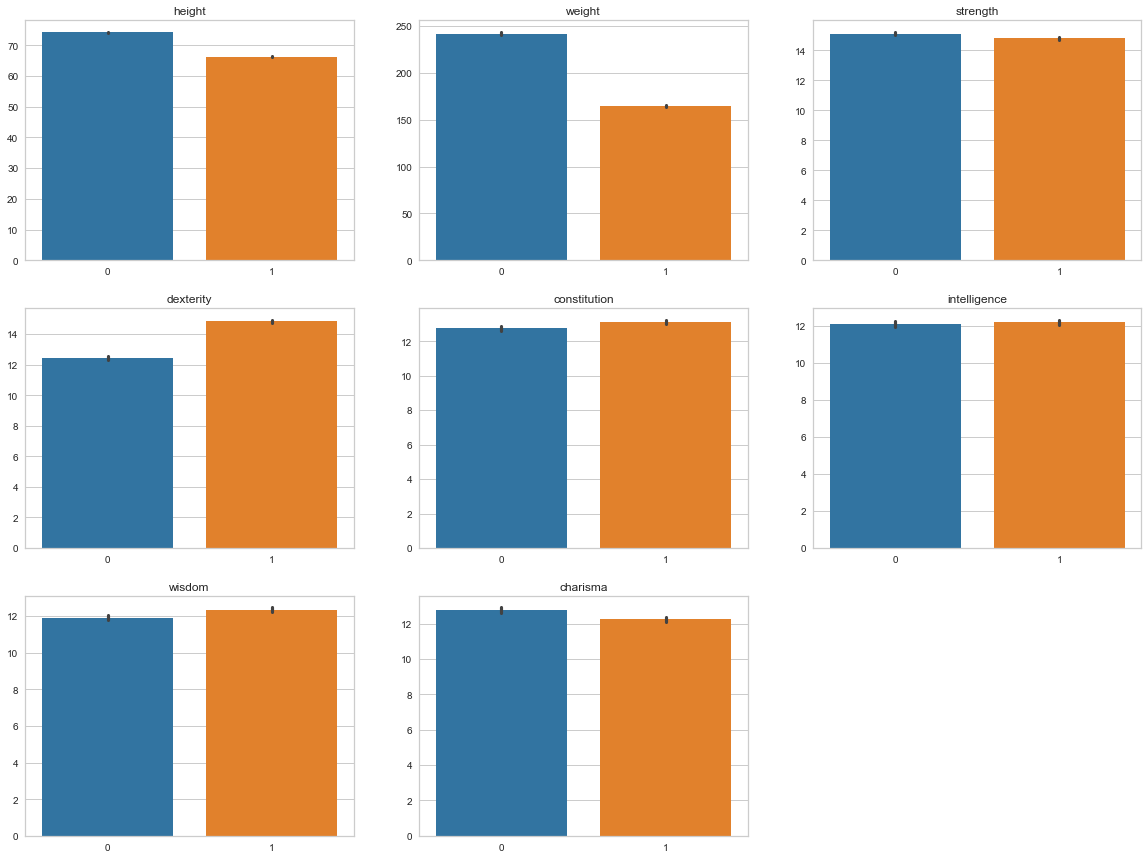

In [18]:
cluster_3 = new_df(dnd,3)
cluster_3 = cluster_clusters(cluster_3,2)
barplot_clusters(cluster_3, "sub_clusters", "cluster_3_bar")